1. Data Preparation

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# Generate synthetic data for normal and jammed signals
np.random.seed(42)
data_size = 1000

# Simulate normal signals
normal_signals = {
    'signal_strength': np.random.normal(1, 0.1, data_size),
    'frequency_deviation': np.random.normal(0, 0.02, data_size),
    'variance': np.random.normal(0.5, 0.1, data_size),
    'label': np.zeros(data_size)  # 0 for normal
}

# Simulate jammed signals
jammed_signals = {
    'signal_strength': np.random.normal(0.5, 0.2, data_size),
    'frequency_deviation': np.random.normal(0.5, 0.1, data_size),
    'variance': np.random.normal(1, 0.2, data_size),
    'label': np.ones(data_size)  # 1 for jammed
}

# Combine the data into a single DataFrame
normal_df = pd.DataFrame(normal_signals)
jammed_df = pd.DataFrame(jammed_signals)
data = pd.concat([normal_df, jammed_df]).sample(frac=1).reset_index(drop=True)

# Feature set and labels
X = data[['signal_strength', 'frequency_deviation', 'variance']]
y = data['label']


2. Model Selection

In [2]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

3. Model Evaluation

Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       306
         1.0       1.00      1.00      1.00       294

    accuracy                           1.00       600
   macro avg       1.00      1.00      1.00       600
weighted avg       1.00      1.00      1.00       600



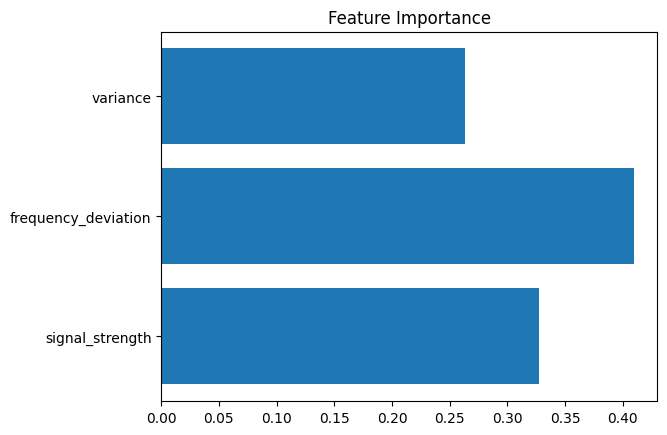

In [3]:
# Predict on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Optional: Plot feature importance
feature_importances = rf_model.feature_importances_
plt.barh(X.columns, feature_importances)
plt.title("Feature Importance")
plt.show()


4. Integrating with Signal Processing Anomaly Detection Layer

In [4]:
def classify_anomaly(signal_strength, frequency_deviation, variance):
    # Prepare the input feature as a DataFrame
    anomaly_features = pd.DataFrame([[signal_strength, frequency_deviation, variance]],
                                    columns=['signal_strength', 'frequency_deviation', 'variance'])
    # Predict using the trained model
    prediction = rf_model.predict(anomaly_features)
    return "Jammed" if prediction == 1 else "Normal"

# Example usage:
# Assuming an anomaly is detected with specific characteristics
anomaly_detected = {'signal_strength': 0.4, 'frequency_deviation': 0.45, 'variance': 1.2}
result = classify_anomaly(anomaly_detected['signal_strength'],
                          anomaly_detected['frequency_deviation'],
                          anomaly_detected['variance'])
print("Anomaly Classification:", result)


Anomaly Classification: Jammed


5. Testing the Pipeline

In [5]:
# Simulate detected anomalies and classify them
detected_anomalies = [
    {'signal_strength': 0.4, 'frequency_deviation': 0.45, 'variance': 1.2},  # Jammed example
    {'signal_strength': 1.1, 'frequency_deviation': 0.01, 'variance': 0.6}   # Normal example
]

for anomaly in detected_anomalies:
    result = classify_anomaly(anomaly['signal_strength'],
                              anomaly['frequency_deviation'],
                              anomaly['variance'])
    print(f"Anomaly features: {anomaly} --> Classification: {result}")


Anomaly features: {'signal_strength': 0.4, 'frequency_deviation': 0.45, 'variance': 1.2} --> Classification: Jammed
Anomaly features: {'signal_strength': 1.1, 'frequency_deviation': 0.01, 'variance': 0.6} --> Classification: Normal
